## Premier League Classification

#### This notebook takes the historical data on English Premier League matches from 2000 to 2018 and aims to build an efficient model that predicts, for each game, if the home team is going to win or not. 

### Data importing and preprocessing with Pandas

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461 entries, 0 to 6460
Data columns (total 23 columns):
Date        6460 non-null object
HomeTeam    6460 non-null object
AwayTeam    6460 non-null object
FTHG        6460 non-null float64
FTAG        6460 non-null float64
FTR         6460 non-null object
HTHG        6460 non-null float64
HTAG        6460 non-null float64
HTR         6460 non-null object
Referee     6460 non-null object
HS          6460 non-null float64
AS          6460 non-null float64
HST         6460 non-null float64
AST         6460 non-null float64
HF          6460 non-null float64
AF          6460 non-null float64
HC          6460 non-null float64
AC          6460 non-null float64
HY          6460 non-null float64
AY          6460 non-null float64
HR          6460 non-null float64
AR          6460 non-null float64
Season      6461 non-null object
dtypes: float64(16), object(7)
memory usage: 1.1+ MB


In [4]:
df.head() #show first 5 columns
df.dtypes # show datatypes

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,4.0,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00-01
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,5.0,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00-01
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,9.0,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00-01
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,6.0,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00-01
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,6.0,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00-01


Date         object
HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HC          float64
AC          float64
HY          float64
AY          float64
HR          float64
AR          float64
Season       object
dtype: object

#### The variables present in the data frame are the following:

- **DateMatch:** Date of the match(dd/mm/yy)
- **HomeTeam:** Home Team
- **AwayTeam:** Away Team
- **FTHG:** Full Time Home Team Goals
- **FTAG:** Full Time Away Team Goals
- **FTR:** Full Time Result (H=Home Win, D=Draw, A=Away Win)
- **HTHG:** Half Time Home Team Goals
- **HTAG:** Half Time Away Team Goals
- **HTR:** Half Time Result (H=Home Win, D=Draw, A=Away Win)
- **Referee:** Match Referee
- **HS:** Home Team Shots
- **AS:** Away Team Shots
- **HST:** Home Team Shots on Target
- **AST:** Away Team Shots on Target
- **HF:** Home Team Fouls Committed
- **AF:** Away Team Fouls Committed
- **HC:** Home Team Corners
- **AC:** Away Team Corners
- **HY:** Home Team Yellow Cards
- **AY:** Away Team Yellow Cards
- **HR:** Home Team Red Cards
- **AR:** Away Team Red Cards
- **Season:** Season (00-01 means the season 2000-2001 and so on)

#### Create new column for home-win

In [5]:
df.loc[df.FTR == 'H', 'HW'] = 1 #for winning the game
df.loc[df.FTR != 'H', 'HW'] = 0 #for loosing the game
df.head() #show first columns

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HF,AF,HC,AC,HY,AY,HR,AR,Season,HW
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00-01,1.0
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00-01,1.0
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00-01,0.0
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00-01,0.0
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00-01,1.0


#### Checking for missing values in the dataset

In [6]:
df.isnull().values.any()
df.isnull().sum()

True

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HTHG        1
HTAG        1
HTR         1
Referee     1
HS          1
AS          1
HST         1
AST         1
HF          1
AF          1
HC          1
AC          1
HY          1
AY          1
HR          1
AR          1
Season      0
HW          0
dtype: int64

As there is only 1 missing value in the dataset of 6461, the Pandas method .dropna() is being applied

In [7]:
df_clean = df.dropna()
df_clean.isnull().values.any()

False

In [8]:
print('Number of home wins:' + str(df_clean.loc[df.HW == 1].shape))

Number of home wins:(3011, 24)


#### Removing rows based on subsetting

In order to go further on preprocessing the data, rows were removed based on subsetting. Data from Season 03-04 was removed, because during this season Arsenal won all of their games and were unbeatable, which makes it kind of an outlier and that's those rows were removed.

In [9]:
df_model=df_clean[df_clean.Season!='03-04']
df_model.shape
df.head()

(6080, 24)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HF,AF,HC,AC,HY,AY,HR,AR,Season,HW
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00-01,1.0
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00-01,1.0
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00-01,0.0
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00-01,0.0
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00-01,1.0


## Model Building

The **target variable** of the model is Home Win (HW), where is being aimed to predict if there will be a Home Win for a team based on a given set of explanatory variables. 

First, the creation of arrays needs to be proceded for the features and the targeted variable. Not all possible variables were taking into account, but just some of them. 

- Not all Full Time Home Team Goals (FTHG), Full Time Away Team Goals (FTAG) and Full Time Result (FTR) were considered as these would explain 100 % of the targeted variable. 

- Half Time Result (HTR) was not considered, which is already given by Half Time Home Team Goals (HTHG) and Halt Time Away Team Goals (HTAG). 

- Home Team Yellow Cards (HY) and Away Team Yellow Cards (AY) were not considered, because these variables are having almost no impact on the model.

- Also variables were not inclued, where it made no sense to include them, i.e. DateMatch, HomeTeam, AwayTeam, Referee and Season.


In [10]:
y = df_clean['HW'].values
X = df_clean[['HS','AS','HST','AST','HF','AF','HC','AC','HTHG','HTAG']].values

In [11]:
X

array([[17.,  8., 14., ...,  6.,  2.,  0.],
       [17., 12., 10., ...,  7.,  1.,  0.],
       [ 6., 16.,  3., ...,  4.,  1.,  1.],
       ...,
       [26.,  8., 11., ...,  0.,  1.,  2.],
       [14., 16.,  6., ...,  4.,  1.,  2.],
       [15., 14.,  4., ...,  6.,  1.,  0.]])

In [12]:
y

array([1., 1., 0., ..., 0., 1., 1.])

### Classification

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20)

#### 1. Logistic Regression

As a first type of algorithm Logistic Regression was selected.

In [15]:
logreg = LogisticRegression(solver='lbfgs')

In [16]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred_logreg = logreg.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[843 203]
 [236 656]]
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      1046
         1.0       0.76      0.74      0.75       892

    accuracy                           0.77      1938
   macro avg       0.77      0.77      0.77      1938
weighted avg       0.77      0.77      0.77      1938



Several settings of Train Test Split were selected and also selecting different explanatory variables and this current setting gave the best results. The algorithm has an precision of ~78% for predicting 0 (Home Team draw or loss) and ~76% for predicting 1 (Home Team wins). The model has 77% accuracy.

#### 2. Random Forest

As a second type of algorithm Random Forest was selected.

In [19]:
rfc = RandomForestClassifier(n_estimators=10)

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[848 198]
 [293 599]]
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.78      1046
         1.0       0.75      0.67      0.71       892

    accuracy                           0.75      1938
   macro avg       0.75      0.74      0.74      1938
weighted avg       0.75      0.75      0.75      1938



Several settings of Random Forest (n_estimators) were treid and this current setting gave the best results. The algorithm has a precision of ~75% for predicting 0 (Home Team draw or loss) and ~75% for predicting 1 (Home Team wins). The model has 75% accuracy.

#### 3. K-Nearest Neighbors

As a third type algorithm K-Nearest Neighbors was selected.

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [24]:
y_pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[789 257]
 [419 473]]
              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70      1046
         1.0       0.65      0.53      0.58       892

    accuracy                           0.65      1938
   macro avg       0.65      0.64      0.64      1938
weighted avg       0.65      0.65      0.65      1938



K-Nearest Neighbors algorithm gives a precision of 65% for predicting 0 (Home Team draw or loss) and 65% for predicting 1 (Home Team wins). The model has 65% accuracy. This result is the worst out of the three algorithms.

### Cross-validation

In the following part a Cross-validation with cross_val_score method and was performed followd by kfold split.

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5)
scores

array([0.76256767, 0.77012384, 0.76470588, 0.77941176, 0.77691712])

In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.01)


In [27]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True, random_state=12)

for train, test in kfold.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    print(X_train[:5])

[[17. 12. 10.  5. 19. 14.  7.  7.  1.  0.]
 [ 6. 16.  3.  9. 15. 21.  8.  4.  1.  1.]
 [ 5.  5.  4.  3. 12. 12.  5.  4.  0.  0.]
 [16.  3. 10.  2.  8.  8.  6.  1.  0.  0.]
 [ 8. 14.  2.  7. 10. 21.  2.  9.  0.  0.]]
[[17.  8. 14.  4. 13. 12.  6.  6.  2.  0.]
 [17. 12. 10.  5. 19. 14.  7.  7.  1.  0.]
 [ 6. 16.  3.  9. 15. 21.  8.  4.  1.  1.]
 [ 6. 13.  4.  6. 11. 13.  5.  8.  1.  2.]
 [17. 12.  8.  6. 21. 20.  6.  4.  2.  0.]]
[[17.  8. 14.  4. 13. 12.  6.  6.  2.  0.]
 [ 6. 13.  4.  6. 11. 13.  5.  8.  1.  2.]
 [17. 12.  8.  6. 21. 20.  6.  4.  2.  0.]
 [ 5.  5.  4.  3. 12. 12.  5.  4.  0.  0.]
 [ 8. 14.  2.  7. 10. 21.  2.  9.  0.  0.]]


## Hyperparameter tuning

In order to further improve the accuracy of the two most accurate classifiers, Logistic Regression and Random Forest, Hyperparameter tuning was applied in order to find the optimal set of hyperparameters for the learning algorithms.

### Hyperparameter tuning for Random Forest

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [30]:
# Use the random grid to search for best hyperparameters
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [31]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

#### After founding the best parameters for Random Forest,  the algorithm was rerun.

In [32]:
rfc1 = RandomForestClassifier(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 10, bootstrap = True)

In [33]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred_rfc1 = rfc1.predict(X_test)
print(confusion_matrix(y_test, y_pred_rfc1))
print(classification_report(y_test, y_pred_rfc1))

[[918 225]
 [287 723]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      1143
         1.0       0.76      0.72      0.74      1010

    accuracy                           0.76      2153
   macro avg       0.76      0.76      0.76      2153
weighted avg       0.76      0.76      0.76      2153



With setting found parameters, Random Forest algorithm gets a slighty better result with a precision of ~76% for predicting 0 (Home Team draw or loss) and ~77% for predicting 1 (Home Team wins). The model has 76% accuracy.

### Hyperparameter tuning for Logistic Regression

In [35]:
c_space = np.logspace(-5, 8, 15)
param_grid1 = {'C': c_space}

In [36]:
logreg_cv1 = GridSearchCV(logreg,param_grid1,cv=5)
logreg_cv1.fit(X_train,y_train)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv1.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv1.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', ref

Tuned Logistic Regression Parameter: {'C': 3.727593720314938}
Tuned Logistic Regression Accuracy: 0.7761783143719526


#### After founding the best parameter C, the algorithm was rerun.

In [37]:
logreg1 = LogisticRegression(solver='lbfgs', C = 3.727593720314938)

In [38]:
logreg1.fit(X_train,y_train)

LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred_logreg1 = logreg1.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_pred_logreg1))
print(classification_report(y_test, y_pred_logreg1))

[[907 236]
 [278 732]]
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1143
         1.0       0.76      0.72      0.74      1010

    accuracy                           0.76      2153
   macro avg       0.76      0.76      0.76      2153
weighted avg       0.76      0.76      0.76      2153



With setting found parameter C, almost the same results as without specifically setting the parameter C were presented with a precision of ~77% for predicting 0 (Home Team draw or loss) and ~76% for predicting 1 (Home Team wins). The model has 76% accuracy.

## ROC Curve

A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers. Therefore, it is being applied to the best two algorithms used, Logistic Regression and Random Forest, to better visualize their performance.

#### Logistic Regression

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

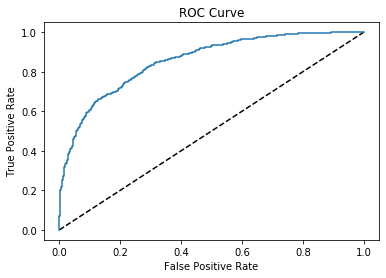

In [42]:
y_pred_logreg_prob = logreg1.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [43]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_logreg_prob)))

AUC: 0.8560969482775049


#### Random Forest

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

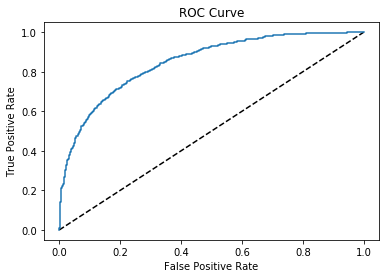

In [44]:
y_pred_rfc_prob = rfc1.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [45]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_rfc_prob)))

AUC: 0.8491411345858996


## Conclusion

To compare different classifiers, it can be useful to calculate the area under the ROC curve (AUC). The AUC for Logistic Regression is slighty better than Random Forest, after doing hyperparameter tuning for both classifiers. This indicates that Logistic Regression algorithm is slighty more accurate when predicting the outcome.